# 1 Author

**Student Name**: Sarthak Tyagi

**Student ID**:  230060771

# 2 Problem formulation

**We will be using the MLEnd Yummy Dataset to build a machine learning pipeline that will take as an input the photo of a dish that has been filtered to include items that only have rice or chips and will predict accordingly whether the picture has rice or chips.**

For our classification, we have downloaded the complete MLEnd Yummy Dataset using the download_yummy function that is a part of the MLEnd pip module. In our case, we are downloading the required files locally on our system instead of using Google drive for the same. This dataset consists of over 3k samples corresponding to dishes from multiple cuisines, made at either home or a restaurant plus some other features, all recorded in a CSV file.




# 3 Machine Learning Pipeline


Our ML pipeline involves taking an image as an input. The image is a description of a dish instance which is represented by 8 attributes as we discussed previously. The output will be the classification of the dish instance as being either a 'Rice' or a 'Chips' item. We are also plotting a corresponding Confusion Matrix for the same that reflects the precision and recall values for the problem in hand.

All in all, our pipeline has 9 steps each of which are described below:

1) **Input (Dataset)** : We download the dataset using the download_yummy function which is a part of the MLEnd pip package. This dataset includes 8 attributes along with an image that is associated with each dish. This serves as input to our pipeline.


2) **Filtering** : We apply a filter to only include those instances that are either Rice or Chips


3) **Labelling/Encoding** : This step involves encoding all the rice/chips samples into numerical values (i.e 0/1)


4) **Evening out Rice/Chips Samples** : Here we will check if our dataset has roughly the equal amount of samples for both the classes. If it so, then we will proceed with Train/Test split, else we manually even out the samples by undersampling/oversampling as necessary.

5) **Train/Test Split** : This step involves splitting our filtered dataset into training and test samples as per the labelled column 'Benchmark_A' provided in our dataset.

6) **Resizing** : We are resizing all the images in our dataset to a 200x200 pixel size.

7) **Feature Extraction** : Here we are defining two functions "get_yellow_component" and "GMLC_features" to extract three features from all our images which we will use in our classification.

8) **Modeling** : This step involves the deployment of our classifier model and the corresponding predictions on test data.

9) **Output** : After fitting the training data to the selected classifier, we run predictions on the test data. We use this information to compute the accuracy of training and test instances and plot out the confusion matrix. This serves as output of our pipeline.

**NOTE: The detailed description as to how Step 2, 3, 4 and 5 are performed is provided in detail in the *7 Dataset* Section** 



# 4 Transformation Stage


As mentioned previously, in our transformation stage we mainly perform some image preprocessing by making all our images of a uniform square shape and resizing them to a fixed size of 200x200 pixels.

Now, to solve our problem of classifying rice vs chips instances using 200x200 pixels photo as a predictor, we need to check its dimensionality. Each photo is described by 3 x 200 x 200 = 120,000 values. Therefore, the predictor space has 120,000 dimensions. To train a model on such a space, we need a training dataset that has more than 120,000 samples which is not practically possible as our dataset only has roughly 3k samples.

So the only way to go is to reduce the dimensionality of the images, in other words, we will have to move them from a 120,000D space to another space that has fewer dimensions. So, we have defined two functions, get_yellow_component and GMLC_features, that extract three image features, namely the percentage of yellow component and some texture information from our image. Additionally, we normalize these features by its mean and standard deviation values respectively to ensure that the 3 attributes in the new prediction space take on a similar range of values.

# 5 Modeling

For modeling purposes, we have to define a classification model that provided the best possible accuracy to both the training and test sets. To achieve this objective, we tried to define several classification models such as SVC, Random Forest, K Nearest Neighbors and so on.

The Support Vector Classifier (SVC) is known to be advantageous for image classification due to its ability to handle high-dimensional data effectively and finding complex boundaries between classes leading to potentially accurate and robust classifications.

On the other hand, Random Forest claims to offer robustness against overfitting, mainly due to its ensemble nature that combines multiple decision trees, and it can handle high-dimensional data efficiently, making it suitable for image feature analysis and classification tasks.

Finally, K Nearest Neighbors (KNN) is relatively simple to understand and implement, leveraging the similarity of neighboring images based on features like textures or colors to make predictions, and it can adapt well to various image complexities without needing assumptions about data distribution, potentially providing accurate classifications for images with similar traits.

So keeping each classifier's potential advantages in mind we need to come up with the best model for our machine learning problem.


# 6 Methodology

For the purpose of training our model, we will be using the training and the testing set that we divided while were doing our data preprocessing. As mentioned previously, our test and training samples are divided on the basis of the labelling done on the 'Benchmark_A' column.

Additionally, we will be using these samples to determine our training and test accuracy. Our training accuracy is determined by taking the mean of all the samples where the predicted value matches the actual value. A similar approach is employed for calculating the testing accuracy where we match the predicted and actual test sample values.

On top of all this , we also plot a confusion matrix that summarizes the model's performance by comparing predicted and actual class labels for rice versus chips instances in a clear and organized way. We can use this to compute the True Positives and True Negatives (which will be the correct classification of either rice and chips) along with the False Positives and False Negatives (which will be the misclassification of one sample to the other sample).


# 7 Dataset


The dataset that we are using is the MLEnd Yummy dataset. The complete dataset can be downloaded using the download_yummy function provided with the mlend pip package. The dataset consists of 3k instances described by 8 attributes namely:

- Photo of the dish.
- Dish name.
- Whether home or restaurant.
- Cuisine.
- Ingredients.
- Diet.
- Healthiness rating.
- Tastiness rating.

The MLEnd Yummy Dataset is basically like a table containing 3250 rows and 12 columns. We have two columns *Healthiness_rating_int* and *Tastiness_Rating_int* that basically map the values provided in the *Healthiness Rating* and *Tastiness Rating* to integer values. We also have an additional column *Benchmark_A* that divided our entire dataset into Training and Testing sets. Most of the attributes are text-based, and therefore can be stored using a text file, for instance, a CSV file. However, the photo attribute is a complex one that is not suitable to be stored in a text file. Consequently, the images are stored in the separate folder *MLEndYD_images* as a JPEG file.

The CSV file *MLEndYD_image_attributes_benchmark.csv* captures the values of all the attributes of each sample. However, instead of an actual photo, this CSV file stores the name of the photo, e.g. '00001.jpg', that is stored in the separate folder *MLEndYD_images*.

We begin by performing some data preprocessing steps on the CSV file for the complete dataset that comes along with all the images. After reading the CSV data to a Pandas dataframe, we apply a filter to only include those instances that are either rice or chips. Here, we are also including french fries as being under category chips whilst we try to weed out the instances where chocolate chips are present as a dish name.

Next, we perform labelling for all our instances that are either rice or chips. Basically, we try to separate out the rice instances from those that are the chips instances. We store this information in a separate column which we add to our original dataframe.

Once we reach this step, we count the number of rice samples and chips samples. We find out the number of rice samples are overwhemingly large in number compared to the chips instances. This is a potential issue while we train our model as it may lead to overfitting and bias our model towards classifying any new instance towards the majority data. To avoid this shortcoming, we undersample our rice samples and bring them down to be equal to the number of chips samples.

The subsequent step involves splitting our data into training and test samples. We do this division on the basis of the "Benchmark_A" column that has labelled all our samples as "Train" and "Test" respectively. After this step, we perform some processing to populate the TrainSet, TestSet and Map dictionaries (based off on our MLEnd pip package) each of which contains the absolute image paths, the actual labels and the encoded labels for the training and test data respectively. We also encode the Rice and Chips labeled instances such that rice is represented by 0 and chips is represented by 1. 

We will begin by installing some Python packages that we required in our code.

In [1]:
# Installing the MLEnd package 
!pip install mlend

In [2]:
# Importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import spkit as sp

from skimage import exposure
from skimage.color import rgb2hsv, rgb2gray

import mlend
from mlend import download_yummy, yummy_load

import os, sys, re, pickle, glob

C:\Users\acer\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated


In [3]:
# Downloading the complete dataset using the download_yummy function provided by the MLEnd pip package
# We store the dataset locally on our system
datadir = download_yummy(save_to = '../MLEnd')

100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓|3250\3250|003250.jpg
Done!


In [4]:
# Listing the present working directory to view all the files present there
os.listdir(datadir)

['MLEndYD_images', 'MLEndYD_image_attributes_benchmark.csv']

In [5]:
# Reading the data from the provided CSV file and storing it a dataframe
MLENDYD_df = pd.read_csv('../MLEnd/yummy/MLEndYD_image_attributes_benchmark.csv')

# Viewing our dataframe
MLENDYD_df.head(5)

,filename,Diet,Cuisine_org,Cuisine,Dish_name,Home_or_restaurant,Ingredients,Healthiness_rating,Healthiness_rating_int,Likeness,Likeness_int,Benchmark_A
0,000001.jpg,non_vegetarian,japanese,japanese,chicken_katsu_rice,marugame_udon,"rice,chicken_breast,spicy_curry_sauce",neutral,3.0,like,4.0,Train
1,000002.jpg,non_vegetarian,english,english,english_breakfast,home,"eggs,bacon,hash_brown,tomato,bread,tomato,bake...",unhealthy,2.0,like,4.0,Train
2,000003.jpg,non_vegetarian,chinese,chinese,spicy_chicken,jinli_flagship_branch,"chili,chicken,peanuts,sihuan_peppercorns,green...",neutral,3.0,strongly_like,5.0,Train
3,000004.jpg,vegetarian,indian,indian,gulab_jamun,home,"sugar,water,khoya,milk,salt,oil,cardamon,ghee",unhealthy,2.0,strongly_like,5.0,Train
4,000005.jpg,non_vegetarian,indian,indian,chicken_masala,home,"chicken,lemon,turmeric,garam_masala,coriander_...",healthy,4.0,strongly_like,5.0,Train


In [6]:
# Creating our own custom filter function to segregate the rice or chips instances from the complete dataset

def filtering(dataframe):
    '''Filter out Rice and Chips instances'''
    
    # Storing all the 'Ingredients' and 'Dish_name' feature values as a string in a local variable
    # This will be used to filter out 'Rice' vs 'Chips' instances
    ingredients = str(dataframe['Ingredients']).lower()
    dish_name = str(dataframe['Dish_name']).lower()
    
    # Segregating the Rice instances from the Chips instances
    rice_instances = 'rice' in ingredients or 'rice' in dish_name
    
    # Adding additional condition to not include the instances where 'chocolate_chips' is the dish being consumed
    chips_instances = ('chips' in ingredients or 'chips' in dish_name) and \
                      ('choc' not in ingredients)
    
    # Including the fries instances to be added under the Chips instance
    fries_instances = 'fries' in ingredients or 'fries' in dish_name
    
    # Returning all the instances that have either Rice or Chips as dishes    
    return rice_instances or chips_instances or fries_instances

def segregate_rice_chips(dataframe):
    
    # Storing all the 'Ingredients' and 'Dish_name' feature values as a string in a local variable
    # This will be now used to create a separate column having labelled 'Rice' vs 'Chips' instances    
    ingredients = str(dataframe['Ingredients']).lower()
    dish_name = str(dataframe['Dish_name']).lower()
    
    # Labelling Rice
    if 'rice' in ingredients or 'rice' in dish_name:
        return "Rice"
    
    # Labelling Chips
    elif 'chips' in ingredients or 'chips' in dish_name:
        return "Chips"
    
    # Labelling Fries as Chips
    elif 'fries' in ingredients or 'fries' in dish_name:
        return "Chips"


In [7]:
# Applying the filter function on our dataframe and getting out the 'rice' and 'chips' dish items
MLENDYD_df = MLENDYD_df[MLENDYD_df.apply(filtering, axis=1)]

In [8]:
# Applying the segregate function on our dataframe and labelling the 'Rice' and 'Chips' instances for our dataset
MLENDYD_df['Rice_Chips'] = MLENDYD_df.apply(segregate_rice_chips, axis=1)

In [9]:
# Counting the number of Rice and Chips instances
rice_count = (MLENDYD_df['Rice_Chips'] == 'Rice').sum()
chips_count = (MLENDYD_df['Rice_Chips'] == 'Chips').sum()

print(f"The number of Rice samples are {rice_count} and the number of chips samples are {chips_count}")

The number of Rice samples are 802 and the number of chips samples are 138


In [10]:
# The rice items are much more in number than the chips items
# To avoid overfitting while training the data, evening out the number of rice and chips instances
# Taking only 138 instances out of a total of 802 instances for the rice samples

rice_df = MLENDYD_df[MLENDYD_df['Rice_Chips'] == 'Rice'].head(138)
chips_df = MLENDYD_df[MLENDYD_df['Rice_Chips'] == 'Chips']

# Concatenating the rice and chips instances and storing it in our original dataframe
MLENDYD_df = pd.concat([rice_df, chips_df])

# Shuffling the dataset to include the rice and chips instances that occur randomly
MLENDYD_df = MLENDYD_df.sample(frac=1, random_state=42) 

In [11]:
# Splitting our entire dataset into Test and Training samples using the labels provided in "Benchmark_A" column
Train_instances = MLENDYD_df[MLENDYD_df['Benchmark_A']=="Train"]
Test_instances  = MLENDYD_df[MLENDYD_df['Benchmark_A']=="Test"]

In [12]:
# Saving the absolute path of all the image files in a variable
img_files = glob.glob(datadir+'/MLEndYD_images/*.jpg')

In [13]:
# Doing some processing to create the TrainSet, TestSet and the Map variables
# Each variable containes the image file paths, the actual labels and the encoded labels

# Storing the image names such as 000001.jpg in a variable
# In my machine, the complete paths had '\\' just before the actual image names
# Thus using that string literal for splitting
img_files_map = {file.split('\\')[-1]:file for file in img_files}
img_filenames = list(img_files_map.keys())


# Using some of the MLEnd pip package code as reference for creating the TrainSet, TestSet and Map

X_train_filepath = []
Y_train =[]

X_test_filepath = []
Y_test = []

# Counting the length of the train and the test instances
train_len = len(Train_instances)
test_len = len(Test_instances)

# Storing the absolute paths for all the images for the training set
files_train = list(Train_instances['filename'])
X_train_filepath = [img_files_map[file] for file in files_train]

# Storing the absolute paths for all the images for the test set
files_test = list(Test_instances['filename'])
X_test_filepath = [img_files_map[file] for file in files_test]

# Encoding the label set (Rice_Chips) column
label_set = ['Rice_Chips']
Y_train = Train_instances[label_set].to_numpy().reshape(train_len,).copy()
Y_test = Test_instances[label_set].to_numpy().reshape(test_len,).copy()

# Populating the TrainSet and TestSet dictionary with the image file paths and the actual labels
TrainSet = {'X_paths':X_train_filepath, 'Y':Y_train}
TestSet  = {'X_paths':X_test_filepath, 'Y':Y_test}

# Defining the mapping for our Rice_Chips column
rice_chips_map ={'rice':0, 'chips':1}


Y_train_enc =[]
Y_test_enc =[]
MAPs = {}

# Assigning label 1 all the Chips instances
# In this, the label 0 is assigned automatically to the Rice instances
y1 = (Train_instances['Rice_Chips'] != "Rice").to_numpy().astype(float)
y2 = (Test_instances['Rice_Chips'] !=  "Rice").to_numpy().astype(float)

Y_train_enc.append(y1.astype(float))
Y_test_enc.append(y2.astype(float))

# Storing all the encoded values as a numpy array
Y_train_enc = np.vstack(Y_train_enc).T.reshape(train_len,).astype(float)
Y_test_enc = np.vstack(Y_test_enc).T.reshape(test_len,).astype(float)


# Adding it to our TrainSet and TestSet dictionary
TrainSet['Y_encoded'] = Y_train_enc
TestSet['Y_encoded'] = Y_test_enc

# Adding the map values for rice and chips to our MAPs dictionary 
MAPs = {'Rice_Chips':rice_chips_map}

In [14]:
TrainSet.keys()

dict_keys(['X_paths', 'Y', 'Y_encoded'])

In [15]:
TestSet.keys()

dict_keys(['X_paths', 'Y', 'Y_encoded'])

In [16]:
MAPs

{'Rice_Chips': {'rice': 0, 'chips': 1}}

In [17]:
TrainSet['Y']

array(['Rice', 'Rice', 'Rice', 'Chips', 'Chips', 'Chips', 'Chips',
       'Chips', 'Chips', 'Rice', 'Chips', 'Chips', 'Chips', 'Chips',
       'Rice', 'Rice', 'Chips', 'Rice', 'Rice', 'Chips', 'Chips', 'Rice',
       'Rice', 'Rice', 'Rice', 'Chips', 'Rice', 'Chips', 'Rice', 'Rice',
       'Rice', 'Rice', 'Chips', 'Rice', 'Chips', 'Chips', 'Chips', 'Rice',
       'Chips', 'Chips', 'Chips', 'Chips', 'Chips', 'Rice', 'Chips',
       'Rice', 'Chips', 'Chips', 'Rice', 'Rice', 'Chips', 'Chips', 'Rice',
       'Chips', 'Rice', 'Rice', 'Rice', 'Chips', 'Chips', 'Chips', 'Rice',
       'Rice', 'Chips', 'Rice', 'Chips', 'Rice', 'Chips', 'Rice', 'Chips',
       'Chips', 'Chips', 'Rice', 'Rice', 'Rice', 'Rice', 'Rice', 'Chips',
       'Rice', 'Chips', 'Rice', 'Rice', 'Chips', 'Chips', 'Chips', 'Rice',
       'Rice', 'Rice', 'Chips', 'Rice', 'Chips', 'Rice', 'Rice', 'Rice',
       'Chips', 'Rice', 'Chips', 'Rice', 'Chips', 'Chips', 'Chips',
       'Rice', 'Chips', 'Chips', 'Rice', 'Rice', 'Chips', 

In [18]:
TrainSet['Y_encoded']

array([0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1.,
       1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0.,
       1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1.,
       1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0.,
       1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1.,
       0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0.,
       1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 1., 0., 1., 0.])

(-0.5, 4031.5, 3023.5, -0.5)

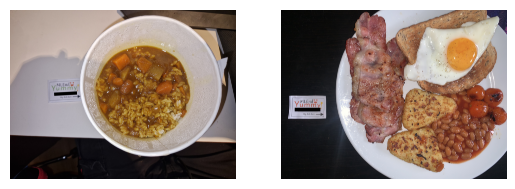

In [19]:
I = plt.imread('../MLEnd/yummy/MLEndYD_images/000001.jpg')
plt.subplot(1,2,1)
plt.imshow(I)
plt.axis('off')

I = plt.imread('../MLEnd/yummy/MLEndYD_images/000002.jpg')
plt.subplot(1,2,2)
plt.imshow(I)
plt.axis('off')

In [20]:
# Storing the value of all the image paths 
X_train_paths = TrainSet['X_paths']
X_test_paths  = TestSet['X_paths']

# Adding the values of the encoded labels to our local variables
Y_train = TrainSet['Y_encoded'].reshape(train_len,)
Y_test  = TestSet['Y_encoded'].reshape(test_len,)

Rice


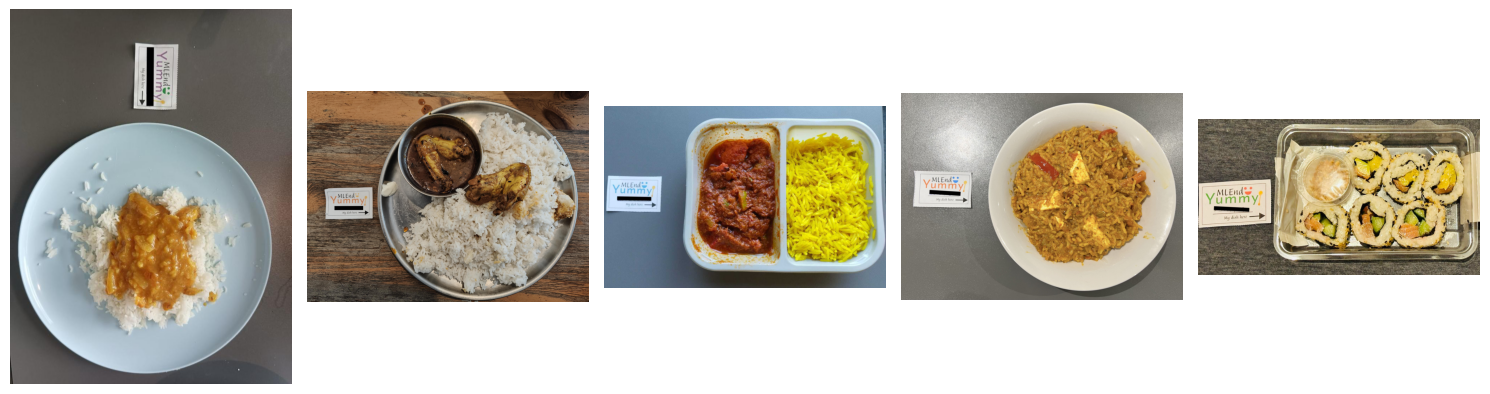

Chips


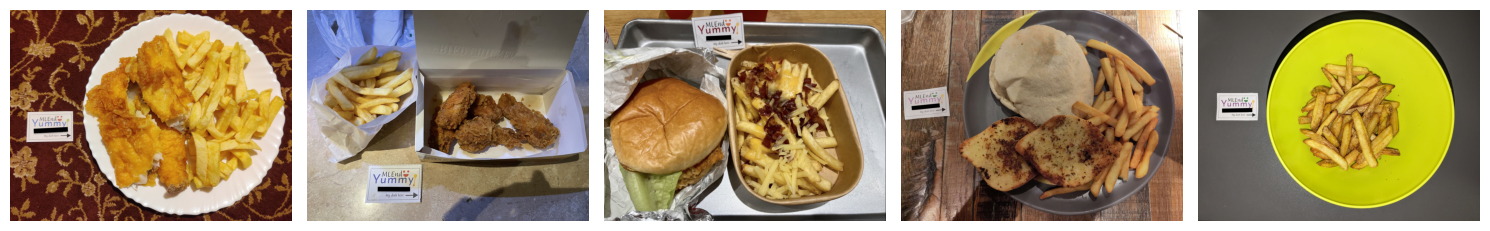

In [21]:
# Creating a numpy array that contains the image file paths for all the Rice and Chips instances
Rice_Img = np.array(X_train_paths)[Y_train==0]
Chips_Img = np.array(X_train_paths)[Y_train==1]

print('Rice')
plt.figure(figsize=(15,5))

# Printing the first five images of Rice
for k,file in enumerate(Rice_Img[:5]):
  I = plt.imread(file)
  plt.subplot(1,5,k+1)
  plt.imshow(I)
  plt.axis('off')

plt.tight_layout()
plt.show()

print('Chips')
plt.figure(figsize=(15,5))

# Printing the first five images of Chips
for k,file in enumerate(Chips_Img[:5]):
  I = plt.imread(file)
  plt.subplot(1,5,k+1)
  plt.imshow(I)
  plt.axis('off')

plt.tight_layout()
plt.show()

In [22]:
# Performing some preprocessing on our images like converting our images into a uniform square shape and  resizing images
def make_it_square(I, pad=0):
  N,M,C = I.shape
  if N>M:
    Is = [np.pad(I[:,:,i], [(0,0),(0, N-M)], 'constant', constant_values=pad) for i in range(C)]
  else:
    Is = [np.pad(I[:,:,i], [(0, M-N),(0,0)], 'constant', constant_values=pad) for i in range(C)]

  return np.array(Is).transpose([1,2,0])

def resize_img(I,size=[100,100]):
  N,M,C = I.shape
  Ir = [sp.core.processing.resize(I[:,:,i],size) for i in range(C)]
  return np.array(Ir).transpose([1,2,0])

In [23]:
# Applying the above defined functions on our training and test samples
X_train = []
for k,file in enumerate(X_train_paths):
  sp.utils.ProgBar_JL(k,len(X_train_paths),L=50,color='blue')
  I = plt.imread(file)
  I = make_it_square(I, pad=0)
  I = resize_img(I,size=[200,200])
  X_train.append(I)


X_test = []
for k,file in enumerate(X_test_paths):
  sp.utils.ProgBar_JL(k,len(X_test_paths),L=50,color='blue')
  I = plt.imread(file)
  I = make_it_square(I, pad=0)
  I = resize_img(I,size=[200,200])
  X_test.append(I)

100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓|180\180|
Done!
100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓|96\96|
Done!


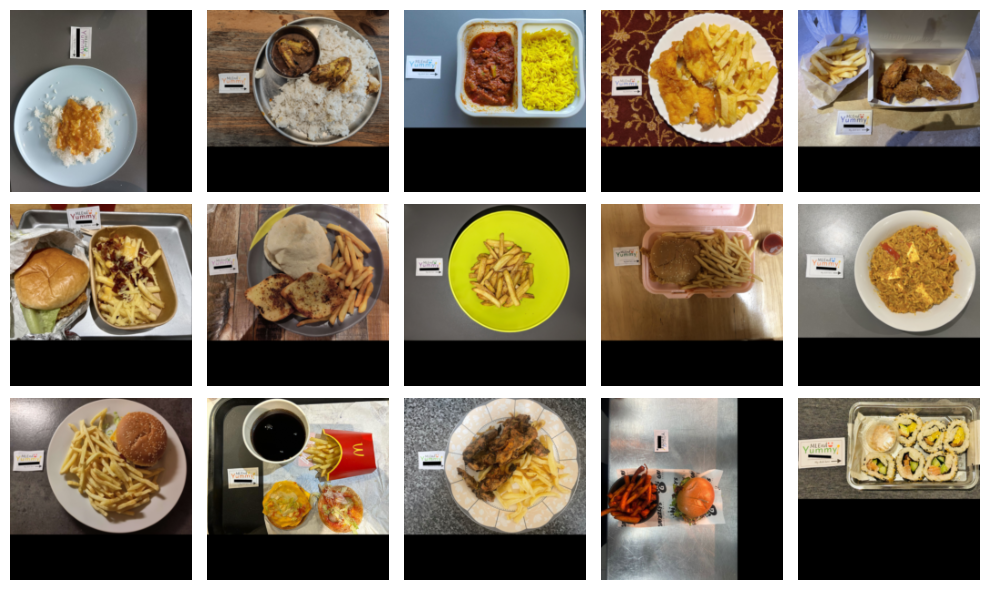

In [24]:
plt.figure(figsize=(10,6))
for k,I in enumerate(X_train):
  plt.subplot(3,5,k+1)
  plt.imshow(I)
  plt.axis('off')
  k+=1
  if k>=15:break
plt.tight_layout()
plt.show()

In [25]:
# Fetching some features from the images and applying that on our dataset
from skimage.feature import ORB
from skimage.feature import graycomatrix, graycoprops



# Getting the percentage of yellow pixels in our image as a feature
def get_yellow_component(I,t1=27, t2=33):
  Ihsv = (rgb2hsv(I)*255).astype('uint8')
  mask = (Ihsv[:,:,0]<t2)*(Ihsv[:,:,0]>t1)
  Ypx = mask.sum()
  return Ypx

# Defining GMLC to extract texture based information from our image as the second and third feature
def GMLC_features(I):
  Ig = (rgb2gray(I)*255).astype('uint8')
  glcm = graycomatrix(Ig, distances=[5], angles=[0], levels=256,
                        symmetric=True, normed=True)
  f1 = graycoprops(glcm, 'dissimilarity')[0, 0]
  f2 = graycoprops(glcm, 'correlation')[0, 0]
  return f1,f2

# Defining a function for creating the Confusion Matrix
def showConfMat(CM, labels = ['Rice','Chips']):
  plt.matshow(CM,cmap='Blues')
  for i in range(CM.shape[0]):
    for j in range(CM.shape[1]):
      plt.text(i,j,CM[i,j].round(2),ha='center',)
  plt.xticks([0,1],labels)
  plt.yticks([0,1],labels)
  plt.show()

In [26]:
# Converting the image pixels stored in the variable into a numpy array to check its dimensionality
X_train = np.array(X_train)

X_test = np.array(X_test)
X_train.shape, X_test.shape

((180, 200, 200, 3), (96, 200, 200, 3))

In [27]:
# Implementing the created feature extraction functions to get the 3 features
# out of images belonging to training and test dataset

X_train_f = []
for k, I in enumerate(X_train):
  f1 = get_yellow_component(I)
  f2,f3 = GMLC_features(I)
  X_train_f.append([f1,f2,f3])

X_test_f = []
for k, I in enumerate(X_test):
    
  f1 = get_yellow_component(I)
  f2,f3 = GMLC_features(I)
  X_test_f.append([f1,f2,f3])

In [28]:
# Converting our features into a numpy array

X_train_f = np.array(X_train_f)
X_test_f = np.array(X_test_f)
X_train_f.shape, X_test_f.shape

((180, 3), (96, 3))

In [29]:
# Normalizing our features

MEAN = X_train_f.mean(0)
SD = X_train_f.std(0)

X_train_fn = (X_train_f - MEAN)/SD
X_test_fn = (X_test_f - MEAN)/SD

# 8 Result

We tried multiple classification models to perform the rice vs chips predictions. The results are discussed below:

- For SVC Classifier, for the parameter value of C=1, we get a balanced output where the Training accuracy is 64% and the testing accuracy is 54%.

- For Random Forest Classifier, for parameter value n_estimators=10, we receive an unusually high training accuracy value of 98% which seems to suggest some overfitting is taking place for the training data. So we discard this model for our classification.

- For K Nearest Neighbors, for the value of k=7 (this value gave us the best balance of train and test accuracy, without overfitting on the train data or compromising on the testing accuracy), we get the training accuracy of 68% and the testing accuracy of 56%.

The results seem to suggest KNN being the best classifier model for our use case. But on analysing the confusion matrix, we observe that although the chips samples are classified correctly with a high accuracy, but for rice samples the misclassification percentage is too high. Apparently, the higher testing accuracy can be attributed to the exceptionally high contribution of the correctly classified chips samples. But this in turn sacrifices the accuracy of rice instances by a huge amount.

On the basis of all these observations, we go ahead with the second best option for our classification that is the SVM.

In [33]:
# Using different classifiers for classification

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

#model = RandomForestClassifier(n_estimators=10)
model = LinearSVC(C=1)
#model = NearestCentroid()
#model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train_fn, Y_train)

C:\Users\acer\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.


LinearSVC(C=1)

In [34]:
# Predicting using our fitted model and storing the output in a variable which is our predicted lables
ytp = model.predict(X_train_fn)
ysp = model.predict(X_test_fn)

train_accuracy = np.mean(ytp==Y_train)
test_accuracy  = np.mean(ysp==Y_test)

print('Training Accuracy:\t',train_accuracy.round(2))
print('Test  Accuracy:\t',test_accuracy.round(2))

Training Accuracy:	 0.64
Test  Accuracy:	 0.54


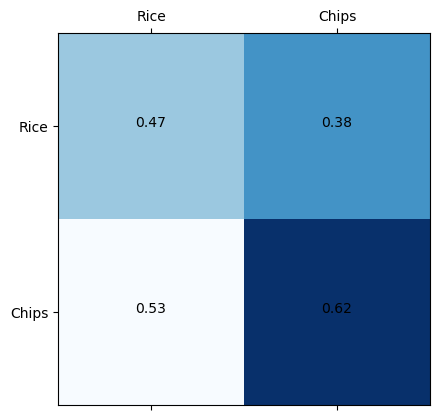

In [35]:
# For our confusion matrix, calculating:
# True Positive, True Negative, False Positive, False Negative

Ac = np.mean(ysp[Y_test.astype(int)==0]==0)
Ar = np.mean(ysp[Y_test.astype(int)==1]==1)

Mc = np.mean(ysp[Y_test.astype(int)==0]==1)
Mr = np.mean(ysp[Y_test.astype(int)==1]==0)

CM = np.array([[Ac, Mc],[Mr, Ar]])

showConfMat(CM)

# 9 Conclusion

- We have observed that during our filtering process (trimming dataset to include only rice and chips instances), the number of rice instances are significantly higher than the number of chips instances. This can somewhat hamper our classification as since the data is skewed towards one class, the predictions will also tilt towards that class. Such cases might also provide us with a higher testing accuracy, but that would be an incorrect observation as our minority class is being sacrificed to achieve this outcome. This will also reflect in the confusion matrix where the rice samples will be seen to have an ununsually high percentage of accurate predictions whereas the predictions on the chips instances will be abnormally low.

- Thus, it it is crucial that we balance out the number of instances between both the classes before carrying out any classification on them.

- From all our experiments using different classification models, we observe that with SVM we observe a balance of good test and training accuracy (without possible overfitting and compromising on one class's accurate classification) for our filtered dataset. This can possibly be attributed to its capability of handling non-linear relationships between image features more efficiently, enhancing its adaptability to diverse and intricate image patterns, ultimately leading to accurate and versatile classification outcomes.

- The confusion matrix shows that rice instances are predicted correctly with an accuracy of 47% and the chips instances are predicted with an accuracy of 62%.

- This suggests that although the chips instances are classified correctly with a higher percentage than that of rice instances being classified correctly overall the difference is not that significant that we should we worried about one class being sacrificed in order to benefit the other.